In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from swarm_sim import *

from IPython.display import display

%matplotlib inline 

## Transformation des données en graphe

Import du CSV et mise en forme des données  
Chaque satellite a ses coordonnées sur 3 lignes (coordonnées x, y et z) et chaque colonne indique son déplacement dans le temps

In [2]:
PATH = 'Traces.csv'

df = pd.read_csv(PATH, sep=',', header=None)
satellites = {}

for i in range(0,100):
    sat = df.iloc[3*i : 3*i+3].copy()
    sat['coords'] = ['x','y','z']
    satellites[i] = sat.set_index('coords', drop=True)

#affichage du premier satellite
satellites[0]


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
coords,,,,,,,,,,,,,,,,,,,,,
x,-4.850747e+05,-4.937755e+05,-5.024536e+05,-5.111086e+05,-5.197401e+05,-5.283476e+05,-5.369309e+05,-5.454894e+05,-5.540229e+05,-5.625310e+05,...,1.490967e+06,1.494274e+06,1.497573e+06,1.500865e+06,1.504149e+06,1.507425e+06,1.510693e+06,1.513954e+06,1.517206e+06,1.520451e+06
y,-7.066530e+05,-7.201117e+05,-7.335372e+05,-7.469290e+05,-7.602864e+05,-7.736088e+05,-7.868957e+05,-8.001464e+05,-8.133603e+05,-8.265368e+05,...,2.218138e+06,2.223313e+06,2.228477e+06,2.233629e+06,2.238769e+06,2.243898e+06,2.249015e+06,2.254120e+06,2.259214e+06,2.264296e+06
z,-2.026363e+06,-2.019625e+06,-2.012795e+06,-2.005871e+06,-1.998855e+06,-1.991747e+06,-1.984548e+06,-1.977257e+06,-1.969876e+06,-1.962403e+06,...,3.692429e+06,3.686602e+06,3.680756e+06,3.674890e+06,3.669006e+06,3.663103e+06,3.657180e+06,3.651239e+06,3.645278e+06,3.639299e+06


Création des graphes en fonction de l'état initial des satellites  
On ajoute un lien entre deux noeuds en fonction de leur distance (trois distances : 20km, 40km, 60km)

In [3]:
RANGE1 = 20000
RANGE2 = 40000
RANGE3 = 60000

list_satellites = []

for i in range(len(satellites)):
    obj_sat = Node.__new__(Node)
    obj_sat.__init__(i, satellites[i][0][0], satellites[i][0][1], satellites[i][0][2])
    list_satellites.append(obj_sat)

swarm = Swarm.__new__(Swarm)
swarm.__init__(RANGE1, list_satellites)
graph1 = swarm.swarm_to_nxgraph()

swarm.__init__(RANGE2, list_satellites)
graph2 = swarm.swarm_to_nxgraph()

swarm.__init__(RANGE3, list_satellites)
graph3 = swarm.swarm_to_nxgraph()


/tmp/ipykernel_104899/3195517332.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj_sat.__init__(i, satellites[i][0][0], satellites[i][0][1], satellites[i][0][2])


## Affichage des graphes obtenus à l'état initial

In [4]:
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
def afficher_graphe(graph):
    fig, ax = plt.subplots(figsize=(15, 9))
    ax.axis("off")
    nx.draw_networkx(graph, pos=nx.random_layout(graph1), ax=ax, **plot_options)

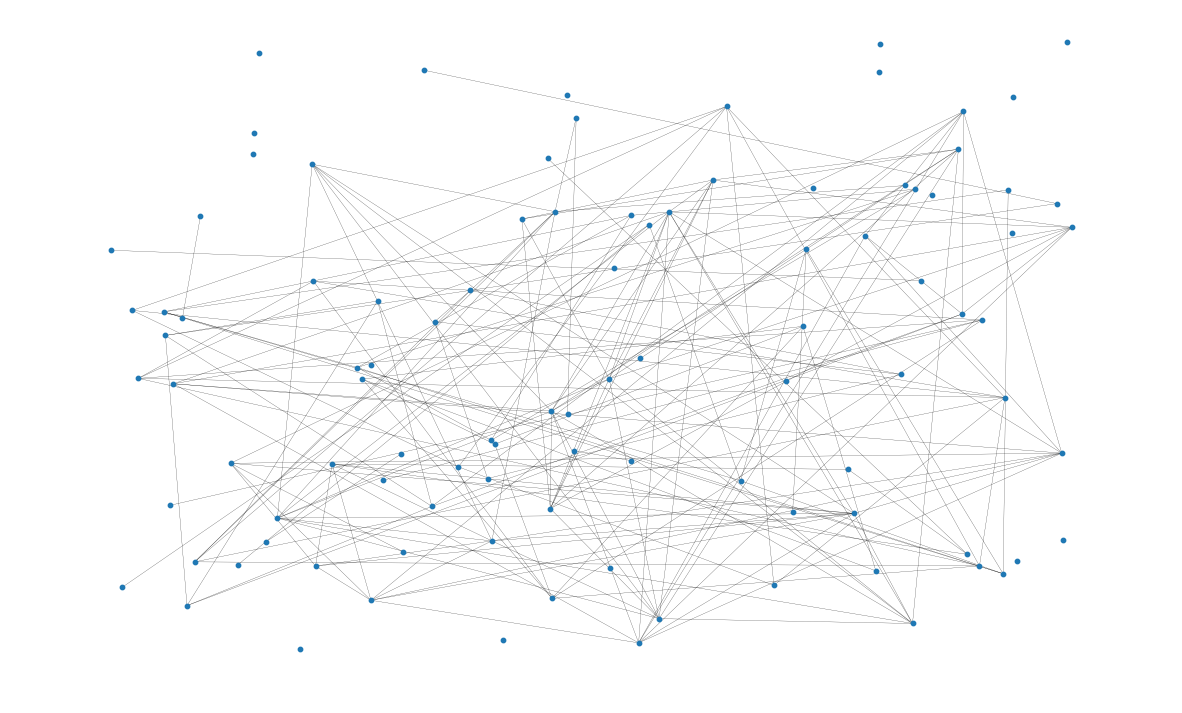

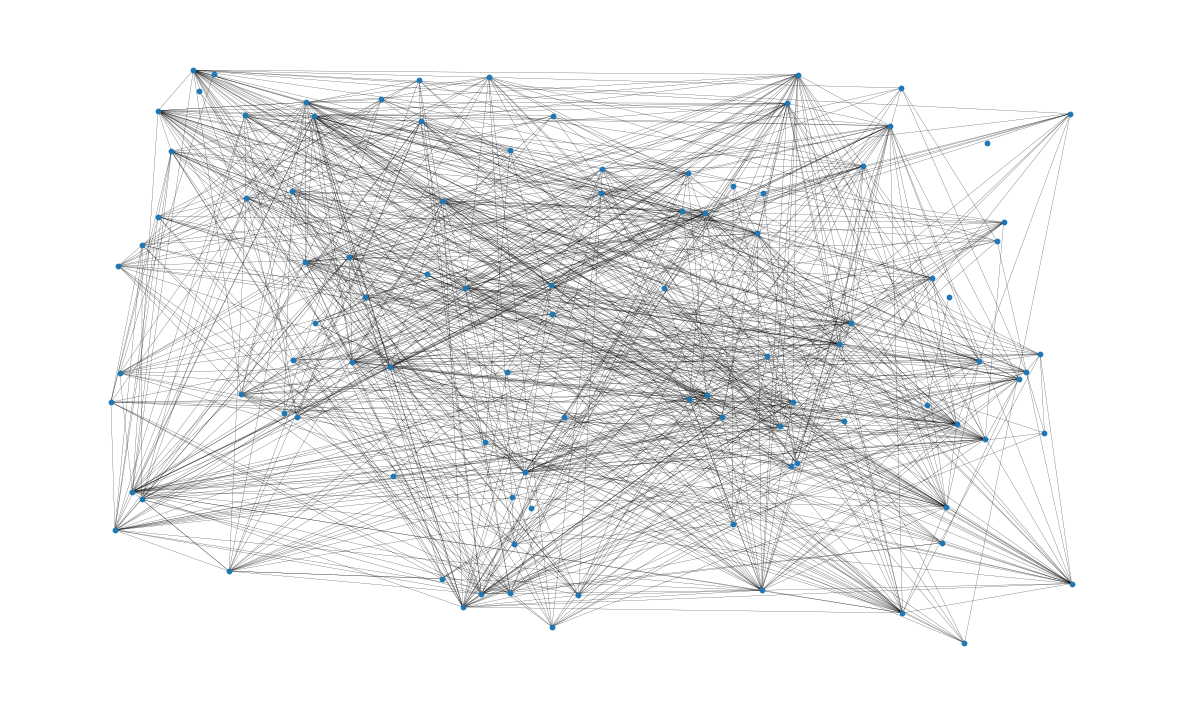

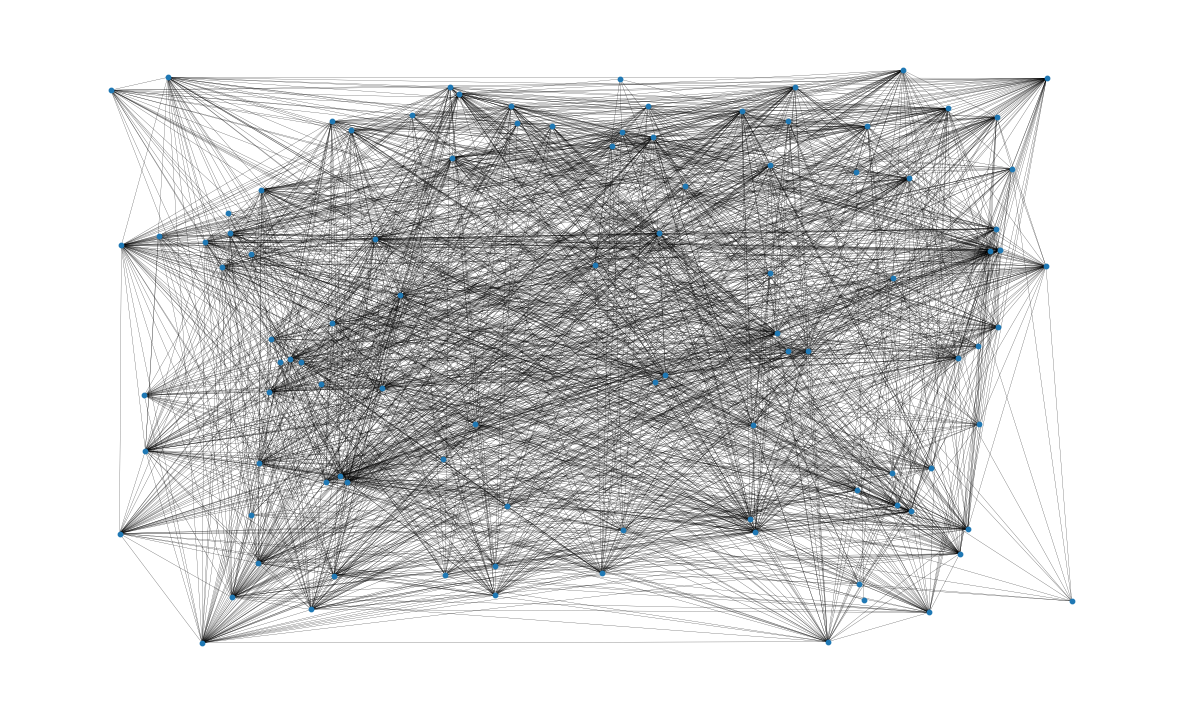

In [5]:
afficher_graphe(graph1) #arc si distance < 20km
afficher_graphe(graph2) #arc si distance < 40km
afficher_graphe(graph3) #arc si distance < 60km

Ici, on a affiché les noeuds du graphe selon une position aléatoire. On remarque bien que plus on allège la contrainte de distance (passage de 20km à 60km), plus le graphe devient fortement connecté, jusqu'à devenir connexe.  
    
On va maintenant afficher le graphe en utilisant un "spring_layout", qui positionne chaque noeud en fonction des autres et des arcs les reliant.

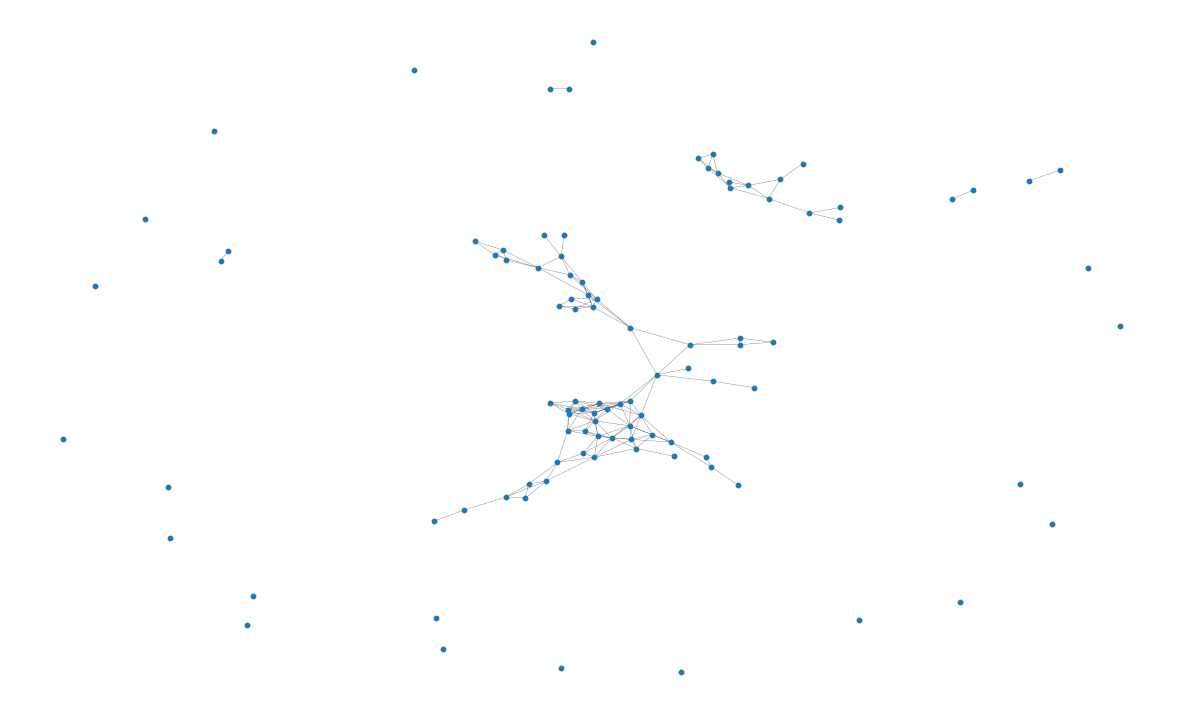

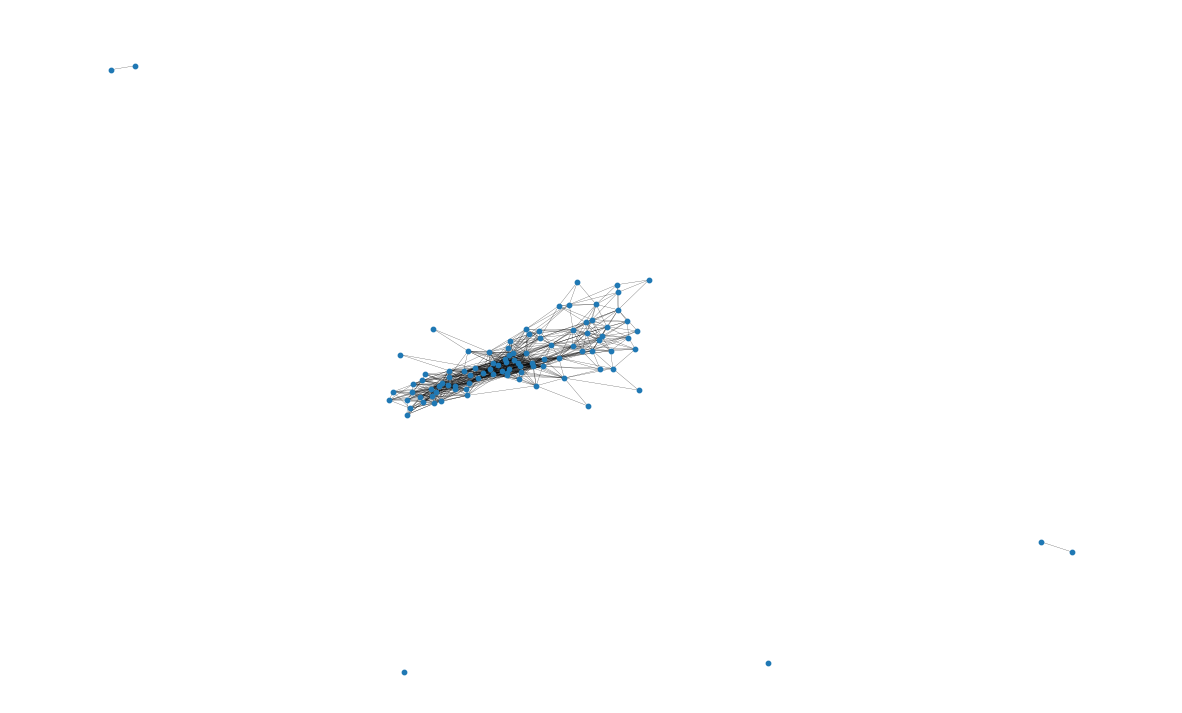

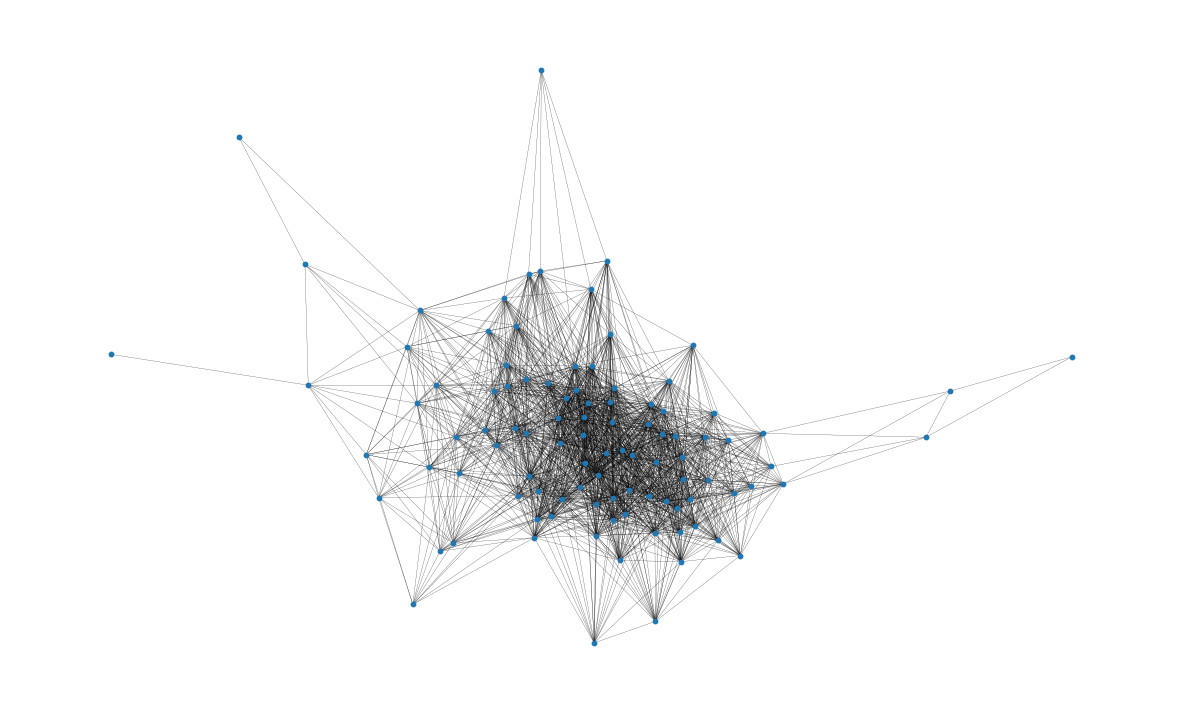

In [6]:
def afficher_graphe_avec_layout(graph):
    pos = nx.spring_layout(graph)
    fig, ax = plt.subplots(figsize=(15, 9))
    ax.axis("off")
    nx.draw_networkx(graph, pos=pos, ax=ax, **plot_options)

afficher_graphe_avec_layout(graph1) #arc si distance < 20km
afficher_graphe_avec_layout(graph2) #arc si distance < 40km
afficher_graphe_avec_layout(graph3) #arc si distance < 60km

## Analyse des graphes à l'état initial

Graphe 1 (20km)

In [7]:
print("Nombre d'arcs ", graph1.number_of_edges())
print("Nombre de noeuds ", graph1.number_of_nodes())
print("Degré moyen des noeuds ", np.mean([d for _, d in graph1.degree()]))

Nombre d'arcs  174
Nombre de noeuds  100
Degré moyen des noeuds  3.48


Graphe 2 (40km)

In [8]:
print("Nombre d'arcs ", graph2.number_of_edges())
print("Nombre de noeuds ", graph2.number_of_nodes())
print("Degré moyen des noeuds ", np.mean([d for _, d in graph2.degree()]))

Nombre d'arcs  883
Nombre de noeuds  100
Degré moyen des noeuds  17.66


Graphe 3 (60km)

In [9]:
print("Nombre d'arcs ", graph3.number_of_edges())
print("Nombre de noeuds ", graph3.number_of_nodes())
print("Degré moyen des noeuds ", np.mean([d for _, d in graph3.degree()]))

Nombre d'arcs  1958
Nombre de noeuds  100
Degré moyen des noeuds  39.16


In [10]:
def afficher_shortest_paths(graph):
    shortest_paths = dict(nx.all_pairs_shortest_path_length(graph))
    df = pd.DataFrame(shortest_paths).fillna("∞") 
    display(df)

afficher_shortest_paths(graph1) #arc si distance < 20km
afficher_shortest_paths(graph2) #arc si distance < 40km
afficher_shortest_paths(graph3) #arc si distance < 60km

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,5.0,∞,∞,∞,4.0,4.0,3.0,6.0,3.0,...,3.0,∞,∞,∞,4.0,1.0,∞,4.0,∞,∞
19,1.0,4.0,∞,∞,∞,3.0,3.0,2.0,5.0,2.0,...,2.0,∞,∞,∞,3.0,1.0,∞,3.0,∞,∞
95,1.0,5.0,∞,∞,∞,4.0,4.0,3.0,6.0,3.0,...,3.0,∞,∞,∞,4.0,0.0,∞,4.0,∞,∞
70,2.0,3.0,∞,∞,∞,2.0,2.0,2.0,4.0,1.0,...,1.0,∞,∞,∞,3.0,2.0,∞,3.0,∞,∞
73,2.0,4.0,∞,∞,∞,3.0,3.0,1.0,5.0,1.0,...,2.0,∞,∞,∞,2.0,2.0,∞,2.0,∞,∞
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞
86,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞
88,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞
93,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,0.0,∞,∞,∞,∞,∞,∞


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,2.0,2.0,∞,2.0,2.0,2.0,1.0,3.0,1.0,...,2.0,3.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,3.0
33,1.0,1.0,2.0,∞,2.0,1.0,1.0,1.0,2.0,1.0,...,1.0,4.0,4.0,3.0,2.0,1.0,3.0,1.0,3.0,2.0
97,1.0,2.0,2.0,∞,2.0,1.0,2.0,1.0,3.0,1.0,...,1.0,3.0,3.0,3.0,1.0,2.0,2.0,0.0,2.0,2.0
70,1.0,1.0,2.0,∞,2.0,1.0,1.0,1.0,2.0,1.0,...,1.0,4.0,4.0,2.0,2.0,1.0,3.0,1.0,3.0,2.0
7,1.0,2.0,2.0,∞,2.0,1.0,2.0,0.0,2.0,1.0,...,1.0,3.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,∞,∞,∞,1.0,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞
34,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞
53,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞
85,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,2,1,3,2,1,2,1,2,1,...,1,2,2,2,1,1,2,1,2,2
2,1,2,0,4,2,1,2,1,2,2,...,1,2,2,3,1,1,1,1,1,1
5,1,1,1,3,2,0,1,1,2,1,...,1,2,2,2,1,1,1,1,2,1
7,1,1,1,3,1,1,1,0,1,1,...,1,2,2,2,1,1,2,1,2,2
9,1,1,2,3,1,1,1,1,1,0,...,1,3,2,2,1,1,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,3,4,2,5,4,3,4,3,4,3,...,3,2,3,5,3,3,2,3,2,2
85,3,3,2,5,4,2,3,3,4,3,...,3,2,3,4,3,3,2,2,1,2
88,3,3,2,5,3,2,3,3,4,3,...,3,1,2,4,2,3,2,2,1,2
86,4,3,5,1,4,4,3,4,3,4,...,4,6,5,2,4,4,5,4,6,5


Comme le dernier graphe (distance <60km) est connexe, il existe un plus court chemin pour n'importe quel couple de noeud. Il est alors possible de calculer son diamètre (la valeur max des plus courts chemins) ainsi que la moyenne des plus courts chemins :

In [11]:
print("Diamètre du graphe 3 : ", nx.diameter(graph3)) 
print("Moyenne des plus courts chemins du graphe 3 : ", nx.average_shortest_path_length(graph3)) 

Diamètre du graphe 3 :  7
Moyenne des plus courts chemins du graphe 3 :  1.881010101010101


Pour le troisième graphe, il faut donc parcourir maximum 7 noeuds pour aller d'un noeud A à un noeud B. Dans le cadre des satellites, pour qu'un message soit envoyé depuis un satellite A vers n'importe quel satellite B, il faudra au maximum utiliser 7 satellites (il faudra passer au maximum par 5 satellites intermédiaires entre A et B).

En moyenne, un message envoyé par un satellite A vers un satellite B passera par 1.8 satellite (soit environ 1 intermédiaire en moyenne).

## Evolution des satellites dans le temps

In [12]:
#Création des graphes

graphs20 = []
graphs40 = []
graphs60 = []

for i in range(satellites[0].shape[1]): #on itere dans le temps
    list_satellites = []
    for j in range(len(satellites)):
        obj_sat = Node.__new__(Node)
        obj_sat.__init__(j, satellites[j][i][0], satellites[j][i][1], satellites[j][i][2])
        list_satellites.append(obj_sat)
    
    swarm.__init__(RANGE1, list_satellites)
    graphs20.append(swarm.swarm_to_nxgraph())

    swarm.__init__(RANGE2, list_satellites)
    graphs40.append(swarm.swarm_to_nxgraph())

    swarm.__init__(RANGE3, list_satellites)
    graphs60.append(swarm.swarm_to_nxgraph())


/tmp/ipykernel_104899/2702850851.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj_sat.__init__(j, satellites[j][i][0], satellites[j][i][1], satellites[j][i][2])


In [13]:
# Analyse du nombre d'arcs dans le temps
df_edges = pd.DataFrame({
    "nb_edges20": [g.number_of_edges() for g in graphs20],
    "nb_edges40": [g.number_of_edges() for g in graphs40],
    "nb_edges60": [g.number_of_edges() for g in graphs60]
})

display(df_edges)

,nb_edges20,nb_edges40,nb_edges60
0,174,883,1958
1,174,881,1952
2,170,880,1951
3,168,875,1953
4,169,876,1956
...,...,...,...
9995,101,599,1471
9996,100,597,1474
9997,100,598,1473
9998,99,599,1473


In [14]:
# Analyse de l'évolution du degré moyen des noeuds
df_degree = pd.DataFrame({
    "mean_degrees20": [np.mean([d for _, d in g.degree()]) for g in graphs20],
    "mean_degrees40": [np.mean([d for _, d in g.degree()]) for g in graphs40],
    "mean_degrees60": [np.mean([d for _, d in g.degree()]) for g in graphs60]
})

display(df_degree)

,mean_degrees20,mean_degrees40,mean_degrees60
0,3.48,17.66,39.16
1,3.48,17.62,39.04
2,3.40,17.60,39.02
3,3.36,17.50,39.06
4,3.38,17.52,39.12
...,...,...,...
9995,2.02,11.98,29.42
9996,2.00,11.94,29.48
9997,2.00,11.96,29.46
9998,1.98,11.98,29.46


In [15]:
# Evolution des diametres des graphes pour la distance <60km
def diametres(g):
    if nx.is_connected(g):
        return str(nx.diameter(g))
    else:
        return "∞"
    
df_diameters = pd.DataFrame({
    "diameters_60": [diametres(g) for g in graphs60]
})

display(df_diameters)

,diameters_60
0,7
1,7
2,7
3,7
4,7
...,...
9995,∞
9996,∞
9997,∞
9998,∞


On remarque que même avec une contrainte de distance de 60km pour que les satellites puissent transmettre entre eux, le graphe n'est pas toujours connecté selon la trajectoire des satellites.

In [16]:
# Evolution de la moyenne des plus courts chemins pour les graphes avec la distance <60km
def mean_shortest(g):
    if nx.is_connected(g):
        return str(nx.average_shortest_path_length(g))
    else:
        return "∞"
    
df_mean_shortest = pd.DataFrame({
    "diameters_60": [mean_shortest(g) for g in graphs60]
})

display(df_mean_shortest)

,diameters_60
0,1.881010101010101
1,1.8822222222222222
2,1.8824242424242423
3,1.8818181818181818
4,1.8808080808080807
...,...
9995,∞
9996,∞
9997,∞
9998,∞


In [17]:
df_degree = pd.DataFrame({
    "mean_degrees20": [nx.density(g) for g in graphs20],
    "mean_degrees40": [nx.density(g) for g in graphs40],
    "mean_degrees60": [nx.density(g) for g in graphs60]
})

display(df_degree)


,mean_degrees20,mean_degrees40,mean_degrees60
0,0.035152,0.178384,0.395556
1,0.035152,0.177980,0.394343
2,0.034343,0.177778,0.394141
3,0.033939,0.176768,0.394545
4,0.034141,0.176970,0.395152
...,...,...,...
9995,0.020404,0.121010,0.297172
9996,0.020202,0.120606,0.297778
9997,0.020202,0.120808,0.297576
9998,0.020000,0.121010,0.297576


In [ ]:
# Evolution du coefficient de clustering
df_clustering = pd.DataFrame({
    "mean_degrees20": [nx.average_clustering(g) for g in graphs20],
    "mean_degrees40": [nx.average_clustering(g) for g in graphs40],
    "mean_degrees60": [nx.average_clustering(g) for g in graphs60]
})

display(df_clustering)

## Mesure de la centralité

### Degree centrality

In [14]:
def degre_centralite(graph) :
    degree_centrality = nx.centrality.degree_centrality(graph)  # save results in a variable to use again
    (sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

    return degree_centrality

degree_centrality_1 = degre_centralite(graph1)
degree_centrality_2 = degre_centralite(graph2)
degree_centrality_3 = degre_centralite(graph3)

In [ ]:
(sorted(graph1.degree, key=lambda item: item[1], reverse=True))[:8]

In [ ]:
def hist_centralite(degree_centrality) :
    plt.figure(figsize=(15, 8))
    plt.hist(degree_centrality.values(), bins=25)
    plt.xticks(ticks=[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7])
    plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
    plt.xlabel("Degree Centrality", fontdict={"size": 20})
    plt.ylabel("Counts", fontdict={"size": 20})

hist_centralite(degree_centrality_1)
hist_centralite(degree_centrality_2)
hist_centralite(degree_centrality_3)

In [ ]:
def graph_centralite(degree_centrality, graph) :
    node_size = [
        v * 1000 for v in degree_centrality.values()
    ]  # set up nodes size for a nice graph representation
    plt.figure(figsize=(15, 8))
    nx.draw_networkx(graph, pos=nx.spring_layout(graph), node_size=node_size, with_labels=False, width=0.3)
    plt.axis("off")

graph_centralite(degree_centrality_1, graph1)
graph_centralite(degree_centrality_2, graph2)
graph_centralite(degree_centrality_3, graph3)

### Betweenness centrality

In [ ]:
def betweenness_centrality(graph) :
    return nx.centrality.betweenness_centrality(graph)  # save results in a variable to use again

betweenness_centrality_1 = betweenness_centrality(graph1)
betweenness_centrality_2 = betweenness_centrality(graph2)
betweenness_centrality_3 = betweenness_centrality(graph3)

(sorted(betweenness_centrality_1.items(), key=lambda item: item[1], reverse=True))[:8]
(sorted(betweenness_centrality_2.items(), key=lambda item: item[1], reverse=True))[:8]
(sorted(betweenness_centrality_3.items(), key=lambda item: item[1], reverse=True))[:8]

In [ ]:
def hist_betweenness_centrality(bet_centrality, distance) :
    plt.figure(figsize=(15, 8))
    plt.hist(bet_centrality.values(), bins=100)
    plt.title("Betweenness Centrality Histogram " + distance, fontdict={"size": 35}, loc="center")
    plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
    plt.ylabel("Counts", fontdict={"size": 20})

hist_betweenness_centrality(betweenness_centrality_1, "20km")
hist_betweenness_centrality(betweenness_centrality_2, "40km")
hist_betweenness_centrality(betweenness_centrality_3, "60km")

Sur le 1er graphe, on constate que beaucoup de noeuds ont leur centralité à 0 car ils ne sont impliqués dans aucun plus court chemin. En effet il y a peu de plus courts chemins, le graphe étant déconnecté.\
Sur le graphe 2, les noeuds sont plus liés mais les plus courts chemins sont longs car les noeuds restent peu connectés. De fait, le ratio entre la somme des plus courts chemins et le nombre de noeuds - 1 peut être plus important que dans le graphe 3.\
Dans le graphe 3, on constate que la centralité est plus basse mais mieux répartie entre les noeuds. En effet, les satellites sont très connectés donc les plus courts chemins sont plus courts et les satellites sont impliqués dans moins de plus courts chemins, le ratio est donc plus bas.

In [ ]:
def graph_betweenness_centrality(betweenness_centrality, graph) :
    node_size = [
        v * 1200 for v in betweenness_centrality.values()
    ]  # set up nodes size for a nice graph representation
    plt.figure(figsize=(15, 8))
    nx.draw_networkx(graph, pos=nx.spring_layout(graph), node_size=node_size, with_labels=False, width=0.15)
    plt.axis("off")

graph_betweenness_centrality(betweenness_centrality_1, graph1)
graph_betweenness_centrality(betweenness_centrality_2, graph2)
graph_betweenness_centrality(betweenness_centrality_3, graph3)

### Closeness centrality

In [ ]:
def closeness_centrality(graph) :
    return nx.centrality.closeness_centrality(graph)  # save results in a variable to use again

closeness_centrality_1 = closeness_centrality(graph1)
closeness_centrality_2 = closeness_centrality(graph2)
closeness_centrality_3 = closeness_centrality(graph3)

(sorted(closeness_centrality_1.items(), key=lambda item: item[1], reverse=True))[:8]
(sorted(closeness_centrality_2.items(), key=lambda item: item[1], reverse=True))[:8]
(sorted(closeness_centrality_3.items(), key=lambda item: item[1], reverse=True))[:8]

In [ ]:
def hist_closeness_centrality(closeness_centrality, distance) :
    plt.figure(figsize=(15, 8))
    plt.hist(closeness_centrality.values(), bins=60)
    plt.title("Closeness Centrality Histogram " + distance, fontdict={"size": 35}, loc="center")
    plt.xlabel("Closeness Centrality", fontdict={"size": 20})
    plt.ylabel("Counts", fontdict={"size": 20})

hist_closeness_centrality(closeness_centrality_1, "20km")
hist_closeness_centrality(closeness_centrality_2, "40km")
hist_closeness_centrality(closeness_centrality_3, "60km")

TODO